# Cusomter Personality Analytics

Customer Personality Analytics involves analyzing customer data to understand their preferences, behaviors, and characteristics. This analysis helps businesses to segment their customers, predict their needs, and tailor their marketing strategies accordingly. By leveraging customer personality analytics, companies can enhance customer satisfaction, improve retention rates, and drive sales growth.

<a id="contents_tabel"></a>    
* [Step 1 | Setup and Initialization](#setup)
    - [Step 1.1 | Importing Necessary Libraries](#libraries) 
    - [Step 1.2 | Loading the Dataset](#load_dataset)
* [Step 2 | Initial Data Analysis](#initial_analysis) 
    - [Step 2.1 | Dataset Overview](#overview) 
    - [Step 2.2 | Summary Statistics](#statistics) 
* [Step 3 | Data Cleaning & Transformation](#data_cleaning)
    - [Step 3.1 | Handling Missing Values](#missing_values)
    - [Step 3.2 | Handling Duplicates](#duplicates)
    - [Step 3.3 | Treating Cancelled Transactions](#InvoiceNo_cleaning)
    - [Step 3.4 | Correcting StockCode Anomalies](#StockCode_cleaning)
    - [Step 3.5 | Cleaning Description Column](#Description_cleaning)
    - [Step 3.6 | Treating Zero Unit Prices](#UnitPrice_cleaning)
    - [Step 3.7 | Outlier Treatment](#outlier_cleaning)
* [Step 4 | Feature Engineering](#feature_engineering)
    - [Step 4.1 | RFM Features](#rfm_features)
        - [Step 4.1.1 | Recency (R)](#recency) 
        - [Step 4.1.2 | Frequency (F)](#frequency)
        - [Step 4.1.3 | Monetary (M)](#monetary)
    - [Step 4.2 | Product Diversity](#product_diversity)
    - [Step 4.3 | Behavioral Features](#behaviroal_features)
    - [Step 4.4 | Geographic Features](#geographical_features)
    - [Step 4.5 | Cancellation Insights](#cancellation_insights) 
    - [Step 4.6 | Seasonality & Trends](#seasonality_trends) 
* [Step 5 | Outlier Detection and Treatment](#outlier_detection)
* [Step 6 | Correlation Analysis](#correlation)
* [Step 7 | Feature Scaling](#scaling)
* [Step 8 | Dimensionality Reduction](#pca)
* [Step 9 | K-Means Clustering](#kmeans) 
    - [Step 9.1 | Determining the Optimal Number of Clusters](#optimal_k) 
        - [Step 9.1.1 | Elbow Method](#elbow)
        - [Step 9.1.2 | Silhouette Method](#silhouette)
    - [Step 9.2 | Clustering Model - K-means](#kmeans_model)
* [Step 10 | Clustering Evaluation](#evaluation)  
    - [Step 10.1 | 3D Visualization of Top Principal Components](#3d_visualization)
    - [Step 10.2 | Cluster Distribution Visualization](#cluster_distributuion) 
    - [Step 10.3 | Evaluation Metrics](#evaluations_metrics)
* [Step 11 | Cluster Analysis and Profiling](#profiling)
    - [Step 11.1 | Radar Chart Approach](#radar_chart)
    - [Step 11.2 | Histogram Chart Approach](#histogram)
* [Step 12 | Recommendation System](#recommendation_system)

<a id="setup"></a>
## Step 1 | Setup and Initialization
⬆️ [Tabel of Contents](#contents_tabel)

<a id="libraries"></a>
### Step 1.1 | Importing Necessary Libraries
⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [3]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
### Step 1.2 | Loading the Dataset
⬆️ [Tabel of Contents](#contents_tabel)

In [5]:
df = pd.read_csv('./data/data.csv', encoding="ISO-8859-1")

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

<a id="initial_analysis"></a>
## Step 2 | Initial Data Analysis
⬆️ [Tabel of Contents](#contents_tabel)

<a id="overview"></a>
### Step 2.1 | Dataset Overview
⬆️ [Tabel of Contents](#contents_tabel)

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Inferences:

The dataset consists of 541,909 entries and 8 columns. Here is a brief overview of each column:

- __`InvoiceNo`__: This is an object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.
   
    
- __`StockCode`__: An object data type column representing the product code for each item. 

    
- __`Description`__: This column, also an object data type, contains descriptions of the products. It has some missing values, with 540,455 non-null entries out of 541,909.

    
- __`Quantity`__: This is an integer column indicating the quantity of products purchased in each transaction.
   

- __`InvoiceDate`__: A datetime column that records the date and time of each transaction.

    
- __`UnitPrice`__: A float column representing the unit price of each product.

    
- __`CustomerID`__: A float column that contains the customer ID for each transaction. This column has a significant number of missing values, with only 406,829 non-null entries out of 541,909.

    
- __`Country`__: An object column recording the country where each transaction took place.

From a preliminary overview, it seems that there are missing values in the `Description` and `CustomerID` columns which need to be addressed. The `InvoiceDate` column is already in datetime format, which will facilitate further time series analysis. We also observe that a single customer can have multiple transactions as inferred from the repeated `CustomerID` in the initial rows.

The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

<a id="statistics"></a>
## Step 2.2 | Summary Statistics
⬆️ [Tabel of Contents](#contents_tabel)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


#### Inferences:


- __`Quantity`__:
   - The average quantity of products in a transaction is approximately 9.55.
   - The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or cancelled orders, which need to be handled appropriately.
   - The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.

    
- __`UnitPrice`__:
   - The average unit price of the products is approximately 4.61.
   - The unit price also shows a wide range, from -11062.06 to 38970, which suggests the presence of errors or noise in the data, as negative prices don't make sense.
   - Similar to the Quantity column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.
 
    
- __`CustomerID`__:
   - There are 406829 non-null entries, indicating missing values in the dataset which need to be addressed.
   - The Customer IDs range from 12346 to 18287, helping in identifying unique customers.

    
- __`InvoiceNo`__:
   - There are 25900 unique invoice numbers, indicating 25900 separate transactions.
   - The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.

    
- __`StockCode`__:
   - There are 4070 unique stock codes representing different products.
   - The most frequent stock code is 85123A, appearing 2313 times in the dataset.

    
- __`Description`__:
   - There are 4223 unique product descriptions.
   - The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times.
   - There are some missing values in this column which need to be treated.

    
- __`Country`__:
   - The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.

<a id="data_cleaning"></a>
## Step 3 |  Data Cleaning & Transformation
⬆️ [Tabel of Contents](#contents_tabel)

<a id="missing_values"></a>
### Step 3.1 | Handling Missing Values
⬆️ [Tabel of Contents](#contents_tabel)

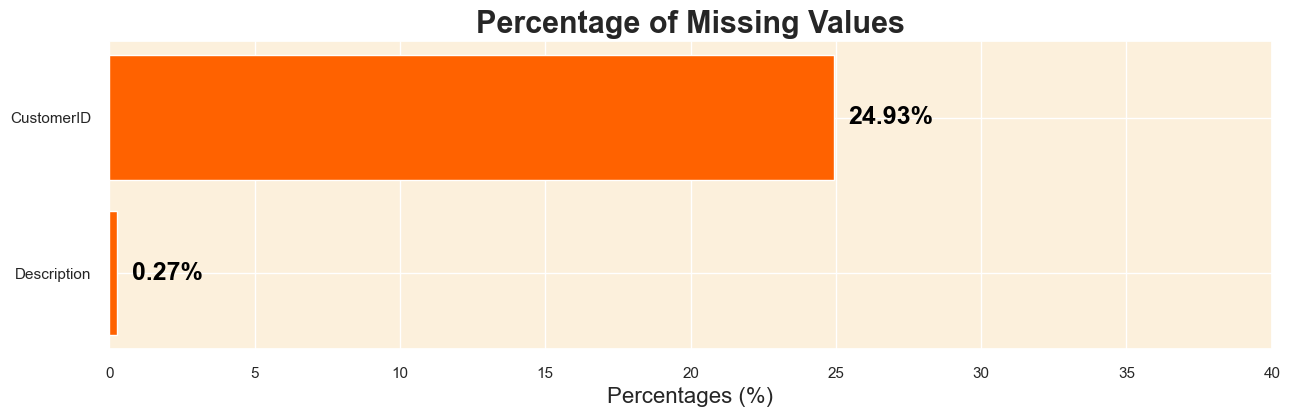

In [10]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

#### Handling Missing Values Strategy:

- __`CustomerID` (24.93% missing values)__
   - The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
    
   - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing `CustomerID`s seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

    
- __`Description` (0.27% missing values)__
   - The `Description` column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same `StockCode` does not always have the same `Description`. This indicates data quality issues and potential errors in the product descriptions.
    
   - Given these inconsistencies, imputing the missing descriptions based on `StockCode` might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing `Description`s to avoid propagating errors and inconsistencies into the subsequent analyses.
   
By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.

In [11]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [12]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [13]:
# Verifying the removal of missing values
df.isnull().sum().sum()

np.int64(0)

<a id="duplicates"></a>
### Step 3.2 | Handling Duplicates
⬆️ [Tabel of Contents](#contents_tabel)

In [14]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


#### Handling Duplicates Strategy:
    
In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system. 

Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

In [15]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [16]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

<a id="InvoiceNo_cleaning"></a>
### Step 3.3 | Treating Cancelled Transactions
⬆️ [Tabel of Contents](#contents_tabel)

In [17]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [18]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


<a id="StockCode_cleaning"></a>
### Step 3.4 | Correcting StockCode Anomalies
⬆️ [Tabel of Contents](#contents_tabel)

In [19]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


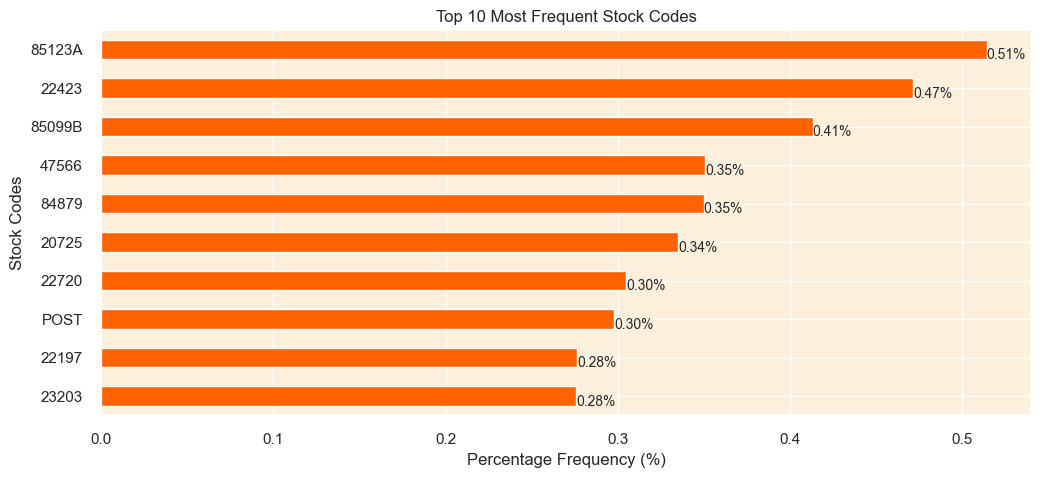

In [20]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [21]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [22]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [23]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [24]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [25]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

<a id="Description_cleaning"></a>
### Step 3.5 | Cleaning Description Column
⬆️ [Tabel of Contents](#contents_tabel)

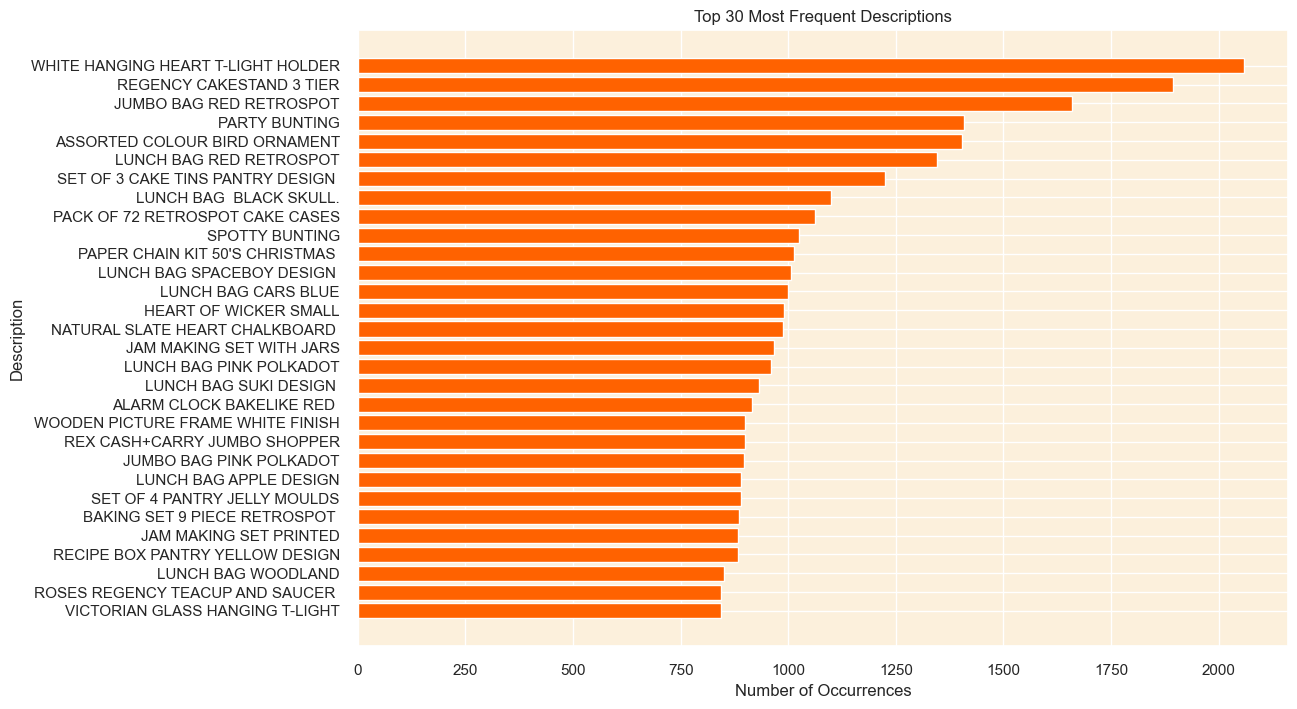

In [26]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [27]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [28]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [29]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

<a id="UnitPrice_cleaning"></a>
### Step 3.6 | Treating Zero Unit Prices
⬆️ [Tabel of Contents](#contents_tabel)

In [30]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [31]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


In [32]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

<a id="outlier_cleaning"></a>
### Step 3.7 | Outlier Treatment
⬆️ [Tabel of Contents](#contents_tabel)

In [33]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [34]:
# Getting the number of rows in the dataframe
df.shape[0]

399573